In [2]:
from __future__ import print_function
import numpy as np
import os

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import TensorBoard
import keras.backend as K

from keras.models import model_from_json, model_from_yaml
from keras.utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
five_thirty_eight = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b",]
# Tell seaborn to use the 538 colors
sns.set_palette(five_thirty_eight)


C:\Users\huanglvjun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# config
batch_size = 128
epochs = 10

num_classes = 10
img_rows, img_cols = 28, 28

log_dir = './logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

In [4]:
# 载入数据，数据预处理
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
if K.image_data_format == 'channel_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
# 归一化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# ont-hot
print(y_train[0])
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 构建模型, 方式一
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh', input_shape=input_shape, name='Conv2D_Layer1'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid',name='MaxPooling2D_Layer1'))
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh', name='Conv2D_Layer2'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

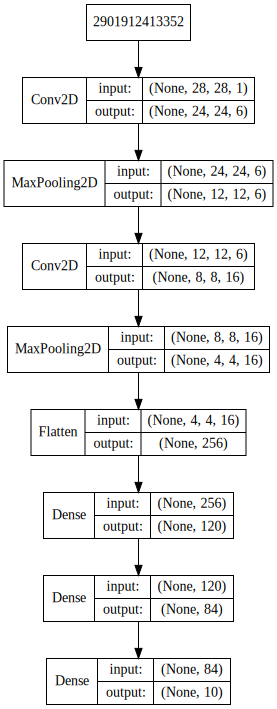

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model=model, show_layer_names=True, show_shapes=True, to_file='LeNet-5_keras.png')
SVG(model_to_dot(model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [11]:
# 定义Tensorboard
with open(os.path.join(log_dir, 'metadata.tsv'), 'w') as f:
    np.savetxt(f, y_test)

tensorboard = TensorBoard(batch_size=batch_size, 
                          embeddings_freq=1, 
                          embeddings_layer_names=['Conv2D_Layer1'], 
                          embeddings_metadata='metadata.tsv', 
                          embeddings_data=x_test)

In [12]:
history = model.fit(x=x_train[:100], y=y_train[:100], batch_size=batch_size, epochs=epochs, callbacks=[tensorboard], validation_data=(x_test,y_test), verbose=1)

Train on 100 samples, validate on 10000 samples
Epoch 1/10
100/100 [==============================] - 4s 37ms/step - loss: 2.3037 - acc: 0.1200 - val_loss: 2.2191 - val_acc: 0.1924
Epoch 2/10
100/100 [==============================] - 2s 21ms/step - loss: 2.1782 - acc: 0.2600 - val_loss: 2.1682 - val_acc: 0.2960
Epoch 3/10
100/100 [==============================] - 2s 20ms/step - loss: 2.0860 - acc: 0.3700 - val_loss: 2.1147 - val_acc: 0.3677
Epoch 4/10
100/100 [==============================] - 2s 22ms/step - loss: 1.9881 - acc: 0.4700 - val_loss: 2.0618 - val_acc: 0.4068
Epoch 5/10
100/100 [==============================] - 2s 20ms/step - loss: 1.8943 - acc: 0.5300 - val_loss: 2.0081 - val_acc: 0.4351
Epoch 6/10
100/100 [==============================] - 2s 20ms/step - loss: 1.8050 - acc: 0.5800 - val_loss: 1.9471 - val_acc: 0.4707
Epoch 7/10
100/100 [==============================] - 2s 19ms/step - loss: 1.7102 - acc: 0.6200 - val_loss: 1.8810 - val_acc: 0.5033
Epoch 8/10
100/100 [=

In [13]:
# 模型保存


MaxPooling2D和MaxPool2D的区别
Convolution2D和Conv2D的区别